In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error ,mean_absolute_error



In [2]:
ds = datasets.load_diabetes()

ds.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [3]:
print(ds['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

### Divide the data into training and testing parts.

In [4]:
# Extract features (independent variables) from the dataset
X = ds.data 

# Extract target variable (dependent variable) from the dataset
Y = ds.target 

# Split the dataset into training and testing sets
# train_size=0.5:  Allocate 50% of the data for training
# test_size=0.5: Allocate 50% of the data for testing 
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.5, test_size=0.5) 

### Create random forest regression model

In [5]:
# Create a Random Forest Regressor model with specified parameters
# n_estimators=100:  Use 100 decision trees in the forest
# max_features=0.2:  Use 20% of the features when building each tree
clf = RandomForestRegressor(n_estimators=100, max_features=0.2) 

# Train the Random Forest model on the training data
clf.fit(X_train, y_train)

RandomForestRegressor(max_features=0.2)

In [6]:
print('MSE:', mean_squared_error(y_test, clf.predict(X_test)))
print('MAE:', mean_absolute_error(y_test, clf.predict(X_test)))

MSE: 2791.001840723982
MAE: 43.31004524886878


### Dependence of quality on the number of trees

In [7]:
# Initialize an empty list to store mean squared error values
Q = []

# Loop through a range of 'n_estimators' values (from 1 to 199, incrementing by 2)
for n_est in range(1, 200, 2):
    # Create a Random Forest Regressor with the current 'n_estimators' value and max_features=0.2
    clf = RandomForestRegressor(n_estimators=n_est, max_features=0.2)

    # Train the Random Forest model on the training data
    clf.fit(X_train, y_train)

    # Predict target values for the test data using the trained model
    predictions = clf.predict(X_test)

    # Calculate the mean squared error (MSE) between the actual target values (y_test) and the predictions
    mse = mean_squared_error(y_test, predictions)

    # Append the MSE to the 'Q' list for later analysis
    Q.append(mse)

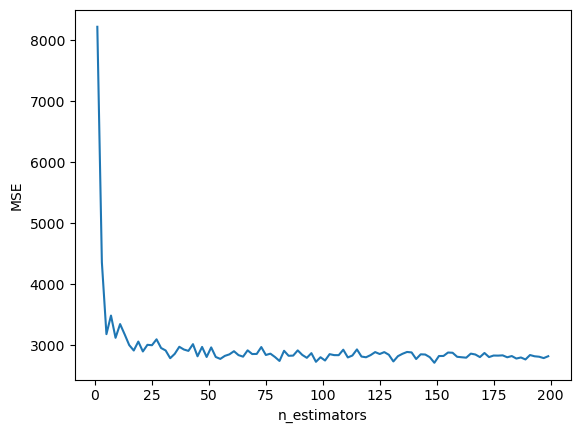

In [8]:
# Plot the MSE values stored in the 'Q' list against the corresponding 'n_estimators' values
plt.plot(range(1, 200, 2), Q) 

# Set the label for the x-axis to 'n_estimators'
plt.xlabel('n_estimators')

# Set the label for the y-axis to 'MSE'
plt.ylabel('MSE')

# Display the generated plot
plt.show()

### Dependence of quality on hyperparameter max_features

In [9]:
# Initialize an empty list to store mean squared error values
Q = []

# Iterate through a range of 'max_features' values (from 1 to 10)
for max_feat in range(1, 11):
    # Create a Random Forest Regressor with n_estimators=100 and the current 'max_features' value
    clf = RandomForestRegressor(n_estimators=100, max_features=max_feat)

    # Train the Random Forest model on the training data
    clf.fit(X_train, y_train)

    # Predict target values for the test data using the trained model
    predictions = clf.predict(X_test)

    # Calculate the mean squared error (MSE) between the actual target values (y_test) and the predictions
    mse = mean_squared_error(y_test, predictions)

    # Append the MSE to the 'Q' list for later analysis
    Q.append(mse)

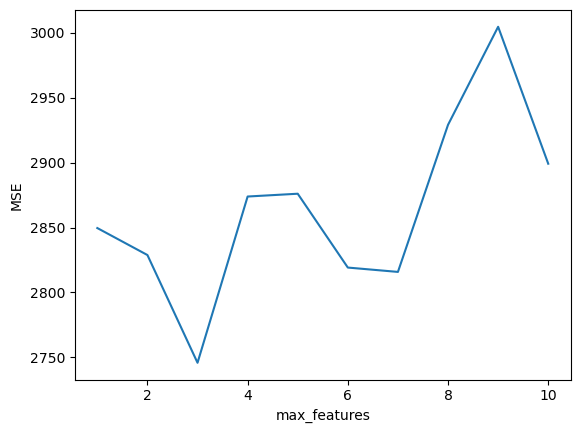

In [10]:
# Plot the MSE values against the corresponding 'max_features' values
plt.plot(range(1, 11), Q)  # Create a line plot with x-axis as 'max_features' (1 to 10) and y-axis as 'MSE' (Q)

# Set the x-axis label
plt.xlabel('max_features') 

# Set the y-axis label
plt.ylabel('MSE')

# Display the plot
plt.show()

### Features importance

In [11]:
import seaborn as sns
import pandas as pd

In [12]:
feature_imp = pd.DataFrame({'importances': clf.feature_importances_, 'name':ds.feature_names})

<Axes: xlabel='importances', ylabel='name'>

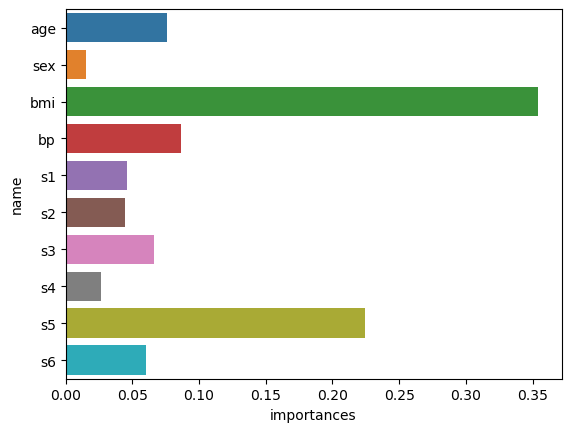

In [13]:
sns.barplot(x='importances', y = 'name', data=feature_imp)

The most important features when training a random forest turned out to be

`bmi` - Body mass index

`s5`  - Possibly log of serum triglycerides level